## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [138]:
boston = datasets.load_boston() #線性回歸
breast_cancer = datasets.load_breast_cancer() #羅吉斯(分兩類)
wine = datasets.load_wine() #羅吉斯(分三類)
print('boston :',boston.data.shape)
print('breast_cancer :',breast_cancer.data.shape)
print('wine :',wine.data.shape)

boston : (506, 13)
breast_cancer : (569, 30)
wine : (178, 13)


###  boston 房價  (線性回歸)

In [139]:
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 2]

print('boston :',X.shape)

x_train, x_test, y_train, y_test = train_test_split(X , boston.target, test_size=0.2, random_state=4)

reg = linear_model.LinearRegression() #加入線性回歸模型

reg.fit(x_train,y_train) #帶入訓練

pred = reg.predict(x_test) #使用資料預測

print('pred:',pred)


boston : (506, 1)
pred: [24.39284968 26.05400345 25.56542881 22.62095233 25.48074254 22.4776371
 28.72487813 17.72869163 17.72869163 16.76457101 27.05721004 24.98565358
 23.070441   16.76457101 23.070441   17.72869163 24.39284968 17.72869163
 17.72869163 24.21696281 17.72869163 16.76457101 12.81037361 23.94336102
 26.659836   23.94336102 22.62095233 15.25976113 17.72869163 23.94336102
 17.72869163 27.14841064 26.9334378  12.81037361 17.72869163 17.72869163
 27.29824019 25.48074254 26.17777569 22.4776371  28.19721753 16.76457101
 17.72869163 27.61092796 25.48074254 27.32429751 29.2199671  25.01822522
 17.72869163 22.62095233 26.2950336  16.76457101 17.72869163 20.45168094
 15.25976113 22.99878338 23.94336102 25.34394164 24.21696281 25.34394164
 15.25976113 17.72869163 27.27869721 11.44887896 26.9334378  28.21024618
 17.72869163 17.72869163 17.72869163 17.72869163 22.62095233 24.39284968
 26.17777569 26.30806226 12.81037361 28.62064888 15.25976113 23.070441
 17.72869163 23.94336102 25.01

In [140]:
# 可以看回歸模型的參數值
print('Coefficients: ', reg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))

Coefficients:  [-0.65143285]
Mean squared error: 75.47


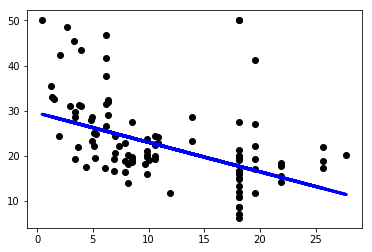

In [141]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, pred, color='blue', linewidth=3)
plt.show()

###  breast_cancer    (羅吉斯回歸)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data , breast_cancer.target, test_size=0.2, random_state=4)

logreg = linear_model.LogisticRegression() #加入羅吉斯模型

logreg.fit(x_train,y_train) #訓練資料

pred = logreg.predict(x_test) #預測資料

print('pred:',pred)


pred: [0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 1]


C:\Users\chad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
acc = accuracy_score(y_test, pred)
print('Accuracy:',acc)

Accuracy: 0.9122807017543859


###  wine   (羅吉斯回歸)

In [144]:
x_train, x_test, y_train, y_test = train_test_split(wine.data , wine.target, test_size=0.2, random_state=4)

logreg = linear_model.LogisticRegression() #加入模型

logreg.fit(x_train, y_train) #訓練資料

pred = logreg.predict(x_test) #預測模型

print(pred)

[2 2 0 0 1 2 0 0 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2]


C:\Users\chad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [145]:
acc = accuracy_score(y_test, pred)
print('Accuracy:',acc)

Accuracy: 0.9722222222222222
